# Rummy - 101 Pool Game - Case Study - Analysis

## Preamble:

101 Pool Game is one of the variants of Rummy game wherein company gets revenue(Cut%) from user's entry fee. 
It is said that parameters such as: 
1. Entry fee (A Buy-In option for User), 
2. Maximum Number of Seats on a Table (Seats) and 
3. Actual Number of Seats(Composition)

formed a configuration which affects revenue and user engagement.

## Objective:

Maximize Revenue and Increase User Engagement by optimizing Configuration(Entry Fee - Seats - Composition) Parameters.

## Limitation(s):

In order to optimize parameters, one should have a balanced approach rather than gravitating weightage to one end. 
Also Cut% (Revenue Parameter) can not be changed drastically.


## Key Findings:

1. Actual users opted seat-2 in high numbers whereas seat-6 has almost 200 counts as composition. Therefore we may creat a slot in between and one higher say seat-4 & seat-8. We can test this using A/B testing to understand on user behavior towards stickness (ie. engagement). Also, we found that 'Seat' had average of 5.2 whereas 'Composition' had 3.5 (As per # of Observations not Date).

2. In terms of raising revenue from entry fee slots, 1000, 3000 & 10000 is gaining higher sum. From Entry Fee Slots 5 to 500, Despite getting almost same number of users entry fee slots 100, 250 & 500 are getting bigger pie of revenue as compared to lower lever of entry fee slots.

3. Day of week such as Tuesday, Thrusday, Friday, & Saturday were high in terms of revenue generation. Thursday had highest ARPU ( Avg Revenue per Unique User). Month graph showed that post Jun, APRU got down slightly whereas it was higher for months before month of May.

4. Linear programming using PuLP python package can be a good model to run for getting weightage of parameters (Entry Fee, Seat, & Composition). Fit equation obtained from linear or lass regression can be used as input for it.


## Recommendations:

1. Data is evident to propose an A/B test for seat-4 & seat-8 combination. Post this pilot, one can be sure to modify this seat configuration.

2. Higher Entry Fee slots yield higher profit. Whereas more number of users lie in the lower level of Entry Fee slots, therefore we need to devise upsell strategy for those users. We may remove 5 & 25 Entry Fee Slots to push users to higher level of entry fee slots. Again A/B testing is preferable to test this.




#### Importing the Required Packages

In [42]:
import pandas as pd                 # For data manipulation, analysis and cleaning
import seaborn as sns               # For data visualization 
import pandas_profiling             # For elementary EDA
import matplotlib.pyplot as plt     # For plotting graphs 
%matplotlib inline                  # Only in a jupyter notebook which tells matplotlib to use jupyter's backend
import warnings                     # To disable warnings
warnings.filterwarnings("ignore")   # To ignore filter warnings

UsageError: unrecognized arguments: # Only in a jupyter notebook which tells matplotlib to use jupyter's backend


#### Loading the Given Excel Data into Data Frame

In [12]:
Rummydb = pd.ExcelFile('101 Pool Game Case Study - Data Set.xlsx') # Reading excel data from local working directory
print(Rummydb)                                                     # Check the object
print(Rummydb.sheet_names)                                         # Checking how many excels sheets are there and their names
df = Rummydb.parse('Sheet_1_crosstab (1)')                         # Parsing the sheet's data into Data Frame
df.head()                                                          # Checking head of data frame                                                    

['Sheet_1_crosstab (1)']


,Date,Entry Fee,Seat,Composition,Cut %,# Users,User Cash Game Count,Rake,Wager
0,"July 1, 2018",10,2,2,0.15,198,593,889.5,5930
1,"July 1, 2018",10,6,2,0.15,347,560,840.0,5600
2,"July 1, 2018",10,6,3,0.15,568,1029,1543.5,10290
3,"July 1, 2018",10,6,4,0.15,584,1035,1552.5,10350
4,"July 1, 2018",10,6,5,0.15,592,1065,1597.5,10650


#### Preliminary EDA :: Data Profiling

In [14]:
pandas_profiling.ProfileReport(df)

Number of variables,9
Number of observations,14161
Total Missing (%),0.0%
Total size in memory,995.8 KiB
Average record size in memory,72.0 B
Numeric,5
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,2


#### Interpretation :: Data Profiling

1. We have 9 variable and 14161 observations with 0 missing value.

2. We need to change the data type for 'Date'(Categorical to Date) & 'Seat'(Boolean to Numeric).

3. 'User Cash Game Count'(Total # of games played) is highly correlated with '# Users'(# of Unique Users), we should ignore one of the two for model exercise. But for analysis they have different connotations.

4. 'Wager' is highly correlated with 'Rake', we should ignore one of the two for model exercise. But for analysis they have different connotations. (Wager * Cut% = Rake)

5. 'Seat' had average of 5.2 whereas 'Composition' had 3.5 (As per # of Observations not Date)

We shall unturn other stones while going ahead with EDA - Bivariate analysis, Correlation-Matrix etc:



In [57]:
# Converting Date to datetime data type
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14161 entries, 0 to 14160
Data columns (total 11 columns):
Date                    14161 non-null datetime64[ns]
Entry Fee               14161 non-null int64
Seat                    14161 non-null int64
Composition             14161 non-null int64
Cut %                   14161 non-null float64
# Users                 14161 non-null int64
User Cash Game Count    14161 non-null int64
Rake                    14161 non-null float64
Wager                   14161 non-null int64
Month                   14161 non-null int64
Day                     14161 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 1.2 MB


#### Correlation Matrix:

We have positive correlations among 'Seat', 'Composition', 'Cut%' & '# Users'

In [28]:
#Dropping Date, User Cash Game Count & Wager for Correlation
df_corr = df.drop(['Date','User Cash Game Count','Wager'], axis=1) 

# Printing 5 random observations
df_corr.sample(5) 

,Entry Fee,Seat,Composition,Cut %,# Users,Rake
2206,100,6,4,0.15,432,13500.0
11202,10,6,5,0.15,85,150.0
2946,250,6,4,0.15,241,19800.0
11880,1000,6,4,0.10,140,38000.0
9978,100,6,4,0.15,206,6300.0


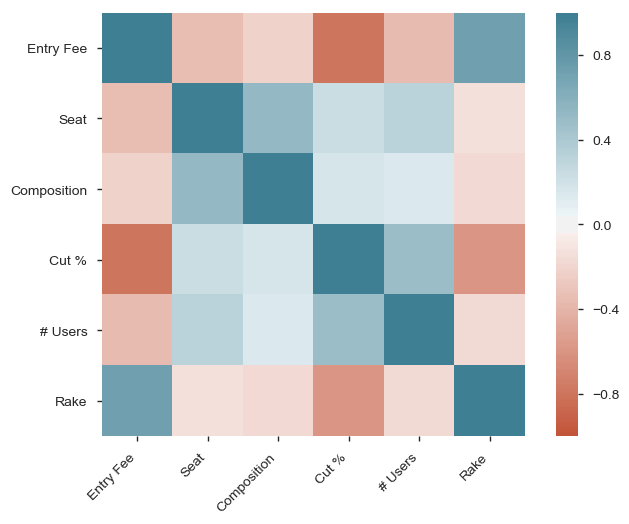

In [27]:
# Plotting Correlation Matrix

corr = df_corr.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In the above correlation matrix, We have positive correlations among 'Seat', 'Composition', 'Cut%' & '# Users'

## Unique Users & Average Revenue

When we plot total unique users and Average Revenue (Rake) against time then we get similar trend across time. This indicates equi-proportionate relationship between two.

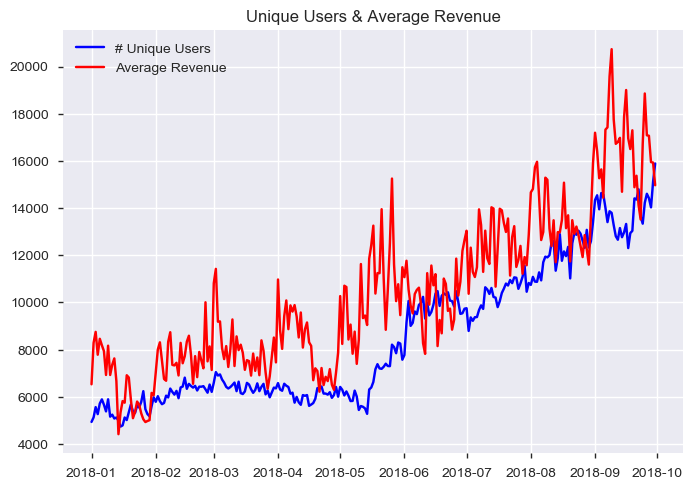

In [86]:
# Plot of group by Date against sum of number of Unique Users and average of rake(revenue)

users = plt.plot(df.groupby('Date').agg({'# Users':'sum'}), color = 'blue', label = '# Unique Users')
revenue = plt.plot(df.groupby('Date').agg({'Rake':'mean'}), color = 'red', label = 'Average Revenue')

plt.legend(loc = 'best')
plt.title("Unique Users & Average Revenue")

plt.show()

## Entry Fee Slots Adoption & Total Revenue

In terms of raising revenue from entry fee slots, 1000, 3000 & 10000 is gaining higher sum. 

From Entry Fee Slots 5 to 500, Despite getting almost same number of users entry fee slots 100, 250 & 500 are getting bigger pie of revenue as compared to lower lever of entry fee slots.


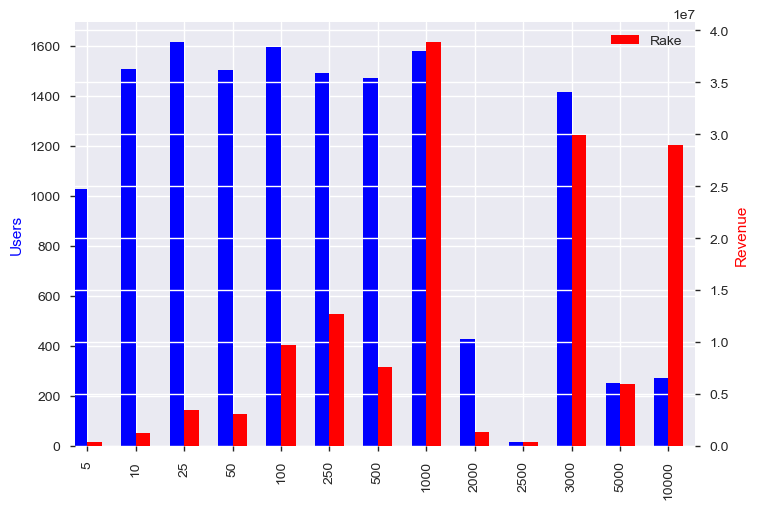

In [297]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

df['Entry Fee'].value_counts().sort_index().plot(kind='bar', color='blue', ax=ax, width=width, position=1)
df.groupby('Entry Fee').agg({'Rake':'sum'}).plot(kind='bar', color='red', ax=ax2, width=width, position=0)

ax.set_ylabel('Users',color='blue')
ax2.set_ylabel('Revenue',color='red')

plt.show()

## Seat & Composition Selection

We see from below graphs that actual users opted seat-2 in high numbers whereas seat-6 has almost 200 counts as composition. 

Therefore we may creat a slot in between and one higher say seat-4 & seat-8. We can test this using A/B testing to understand on user behavior towards stickness (ie. engagement) 

Also, we found that 'Seat' had average of 5.2 whereas 'Composition' had 3.5 (As per # of Observations not Date)



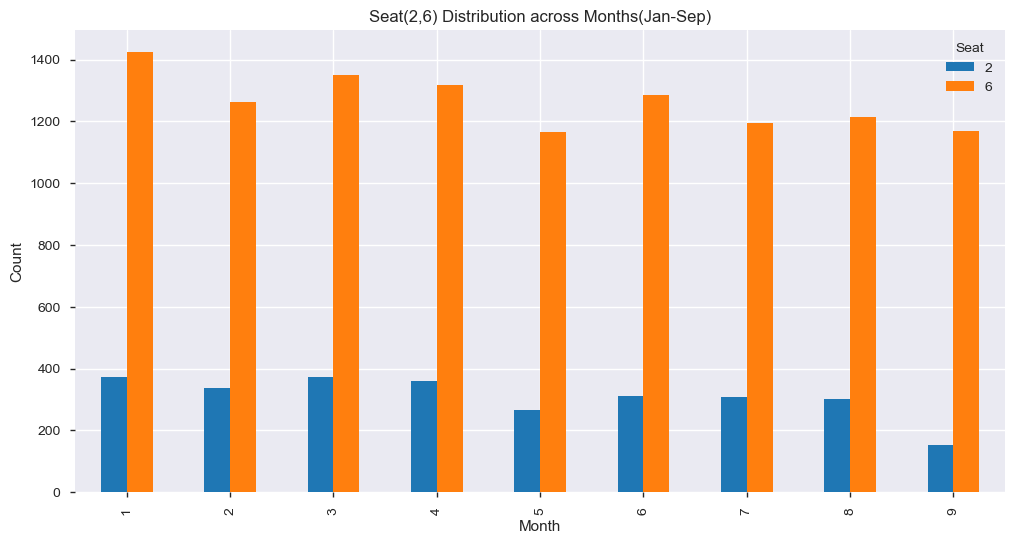

In [68]:
# Plotting bar graph of seat across months of year 2018

df.groupby(['Month', 'Seat']).size().unstack().plot(kind='bar', title="Seat Distribution", figsize=(12,6))


# Inserting Title and Axis label to plot
plt.ylabel('Count')
plt.title('Seat(2,6) Distribution across Months(Jan-Sep)');

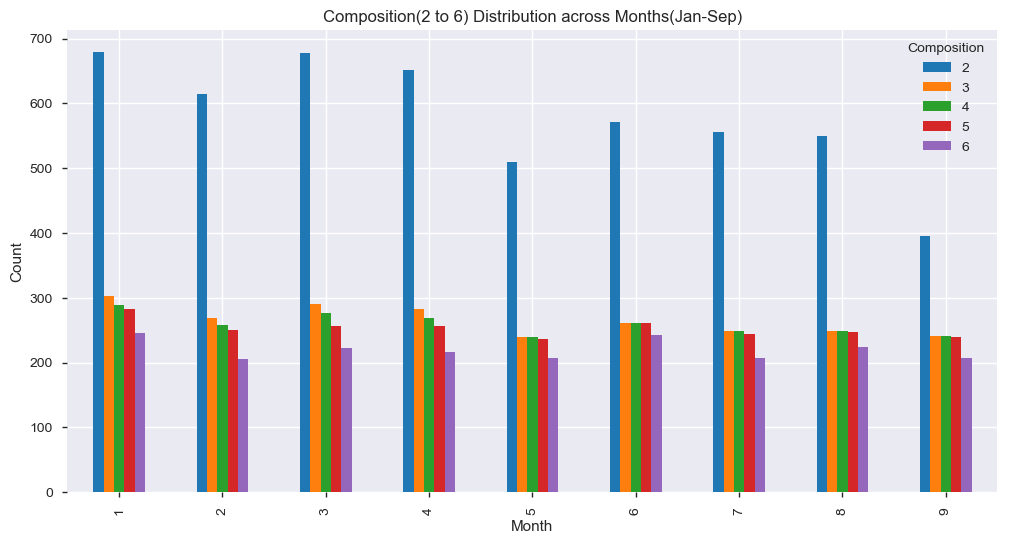

In [62]:
# Plotting bar graph of Composition across months of year 2018
df.groupby(['Month', 'Composition']).size().unstack().plot(kind='bar', title="Composition Distribution", figsize=(12,6))

# Inserting Title and Axis label to plot
plt.ylabel('Count')
plt.title('Composition(2 to 6) Distribution across Months(Jan-Sep)');

C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


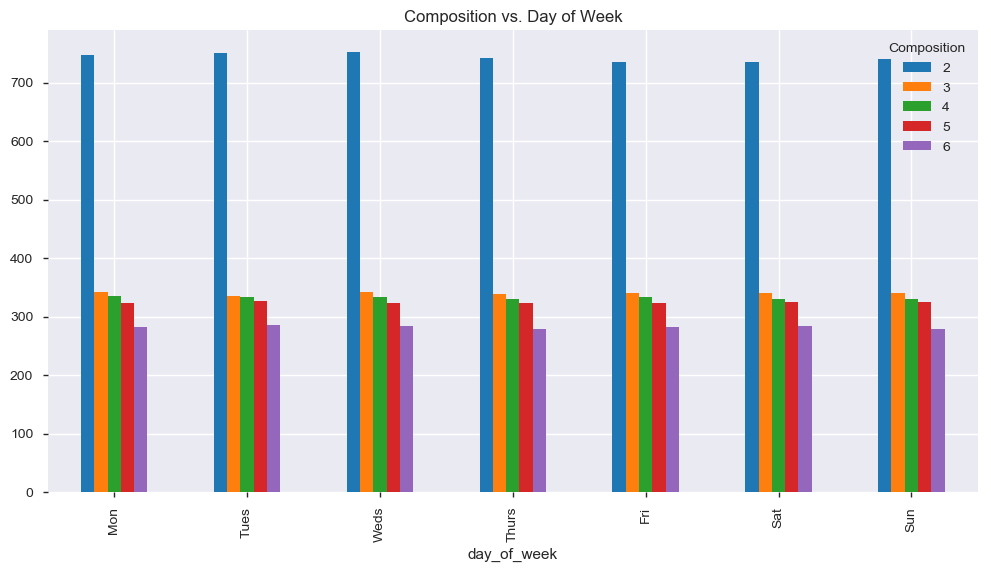

In [298]:
df['day_of_week'] = df['Date'].apply(lambda val: val.weekday_name)

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df.groupby(['day_of_week','Composition']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))

ticks = list(range(0, 7, 1)) # points on the x axis where label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Composition vs. Day of Week');

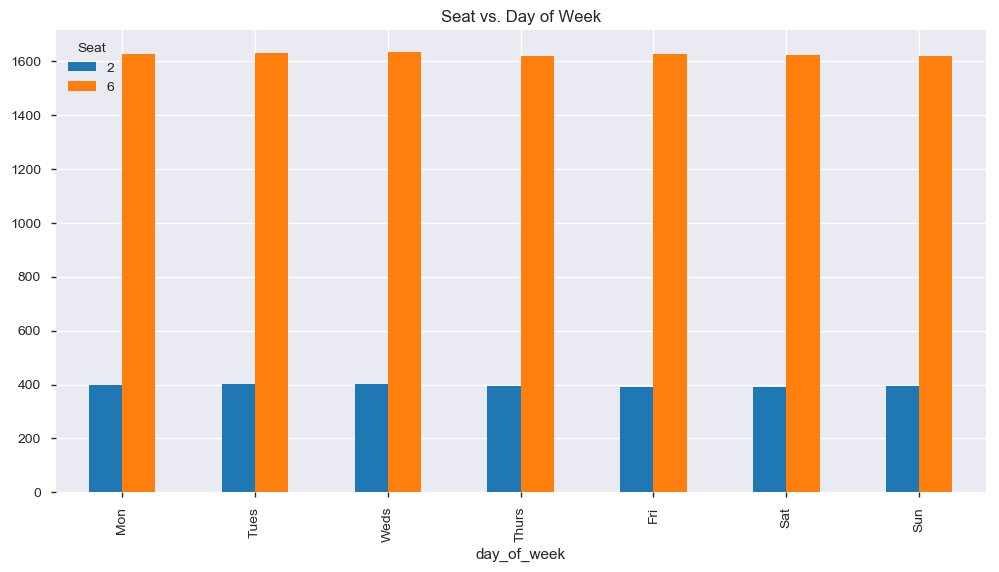

In [299]:
df.groupby(['day_of_week','Seat']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))

ticks = list(range(0, 7, 1)) # points on the x axis where label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Seat vs. Day of Week');

## Unique Users & Revenue across Day of Week & Months

From the below graphs, Tuesday, Thrusday, Friday, & Saturday were high in terms of revenue generation. Thursday had highest ARPU ( Avg Revenue per Unique User).

Month graph showed that post Jun, APRU got down slightly whereas it was higher for months before month of May.

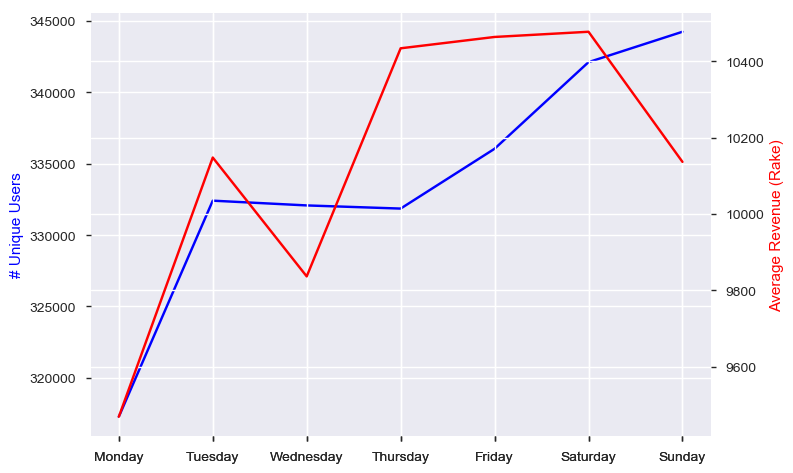

In [113]:
from pylab import figure, show, legend, ylabel

# General Figure creation with open size
fig1 = figure()

# The first axis 'ax1' using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(df.groupby('day_of_week').agg({'# Users':'sum'}).reindex(cats), 'blue')
ylabel("# Unique Users",color='blue')

# The second axes 'ax2' that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(df.groupby('day_of_week').agg({'Rake':'mean'}).reindex(cats), 'red')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Average Revenue (Rake)",color='red')

show()

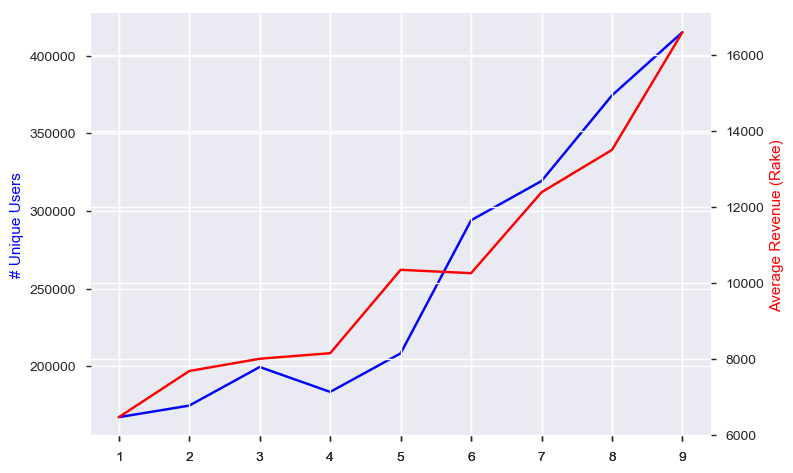

In [112]:
from pylab import figure, show, legend, ylabel

# General Figure creation with open size
fig1 = figure()

# The first axis 'ax1' using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(df.groupby('Month').agg({'# Users':'sum'}), 'blue')
ylabel("# Unique Users",color='blue')

# The second axes 'ax2' that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(df.groupby('Month').agg({'Rake':'mean'}), 'red')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Average Revenue (Rake)",color='red')

show()

# MODEL BUILDING EXCERCISE

I am applying linear Regression & Lasso Regression to obtain an fit line equation. Later I can use it for linear programming using PuLP python package for weightage of parameters (Entry Fee, Seat, & Composition) 

### Applied Linear Regression

In [145]:
# Importing necessary packages

import numpy as np
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [228]:
# Creating Target & Independent Variables dataset

x = df_corr.iloc[:,[0,1,2,3,4]]
y = df_corr.iloc[:, [5]].values

In [231]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [232]:
linearRegressor = LinearRegression()

In [233]:
linearRegressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [234]:
yPrediction = linearRegressor.predict(xTest)

### Applied Linear Regression using Statsmodels API

In [235]:
import statsmodels.api as sm

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

model.summary()

C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     3635.
Date:                Thu, 18 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:46:21   Log-Likelihood:            -1.5426e+05
No. Observations:               14161   AIC:                         3.085e+05
Df Residuals:                   14155   BIC:                         3.086e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5299.8839   1208.790      4.384      0.000    2930.496    7669.271
Entry Fee       8.4607      0.112     75.709      0.000       8.242       8.680
Seat         2259.1678     87.296     25.879      0.000    2088.056    2430.279
Composition -1539.3504     87.821    -17.528      0.000   -1711.491   -1367.210
Cut %       -8.157e+04   7941.208    -10.272      0.000   -9.71e+04    -6.6e+04
# Users        12.2915      0.758     16.225      0.000      10.807      13.776
==============================================================================
Omnibus:                     8167.379   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222390.394
Skew:                           2.265   Prob(JB):                         0.00
Kurtosis:                      21.878   Cond. No.                     1.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [236]:
model.pvalues

const           1.171159e-05
Entry Fee       0.000000e+00
Seat           2.517520e-144
Composition     4.553892e-68
Cut %           1.147704e-24
# Users         1.137834e-58
dtype: float64

In [237]:
model.rsquared

0.5621655814998004

In [238]:
linearRegressor.score(xTest, yTest)

0.5729548821183792

### Applied Lasso Linear Regression (On Normalized Data)

In [239]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0, normalize = True)
lasso_reg.fit(xTrain, yTrain)

C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

In [240]:
lasso_reg.score(xTest, yTest)

0.572954882118379

In [241]:
lasso_reg.coef_

array([ 8.43926394e+00,  2.31436058e+03, -1.62170658e+03, -7.89591385e+04,
        1.23506396e+01])

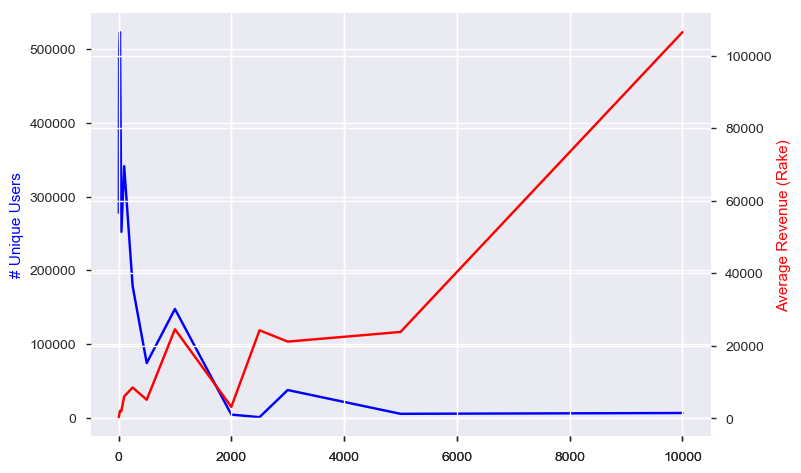

In [244]:
from pylab import figure, show, legend, ylabel

# General Figure creation with open size
fig1 = figure()

# The first axis 'ax1' using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(df.groupby('Entry Fee').agg({'# Users':'sum'}), 'blue')
ylabel("# Unique Users",color='blue')

# The second axes 'ax2' that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(df.groupby('Entry Fee').agg({'Rake':'mean'}), 'red')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Average Revenue (Rake)",color='red')

show()

#### P.S.
Due to time constraint, I did not ran linear programming using PuLP for getting optimum mix. 